In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

In [10]:
%matplotlib inline

In [11]:
df = pd.read_csv("https://gist.githubusercontent.com/palewire/ad6b9e6ce07961a1a00c3221a498fa4c/raw/778ee705b026be762ba373c3f650bb0f92f92bd3/fangraphs-starters-pitch-value-2018.csv")

In [12]:
df.head()

,Name,Team,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C,wSF/C,wKN/C,playerid
0,Max Scherzer,Nationals,30.2,10.7,-1.4,-3.4,9.6,NaN,NaN,1.72,1.86,-0.41,-1.27,1.75,NaN,NaN,3137
1,Justin Verlander,Astros,30.2,3.9,-2.6,8.6,-2.8,NaN,NaN,1.44,0.51,-13.18,1.73,-5.41,NaN,NaN,8700
2,Gerrit Cole,Astros,29.9,3.1,NaN,-0.5,1.9,NaN,NaN,1.63,0.47,NaN,-0.08,1.33,NaN,NaN,13125
3,Jacob deGrom,Mets,23.9,15.9,NaN,4.6,12.8,NaN,NaN,1.43,2.08,NaN,1.81,2.48,NaN,NaN,10954
4,Zack Wheeler,Mets,23.8,4.5,NaN,1.6,0.5,-0.3,NaN,1.42,0.82,NaN,0.52,0.43,-0.11,NaN,10310


In [25]:
trimmed_df = df[[
    #'Name',
    'wFB/C',
    'wSL/C',
    'wCT/C',
    'wCB/C',
    'wCH/C'
]]

In [26]:
trimmed_df.shape

(128, 5)

In [27]:
trimmed_df.isna().head()

,wFB/C,wSL/C,wCT/C,wCB/C,wCH/C
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [28]:
trimmed_df.fillna(0, inplace=True)

/home/palewire/.virtualenvs/baseball-notebooks/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [29]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(trimmed_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
labels = kmeans.predict(trimmed_df)
centroids = kmeans.cluster_centers_

TypeError: object of type 'map' has no len()

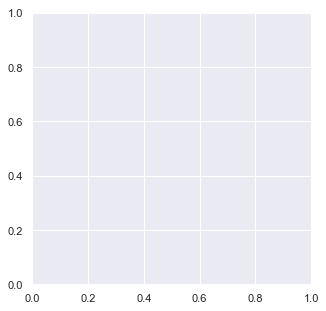

In [33]:
fig = plt.figure(figsize=(5, 5))

colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['wFB/C'], df['wSL/C'], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()